<a href="https://colab.research.google.com/github/RoelPi/name_analysis/blob/master/sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
gdir = '/content/gdrive'
import pandas as pd
from google.colab import drive
drive.mount(gdir)
import glob
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

!pip install unidecode
from unidecode import unidecode

from math import pi

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path = r'/content/gdrive/My Drive/Blog/names_analysis/' # use your path
dir_m = glob.glob(path + 'm*.csv')
dir_f = glob.glob(path + 'v*.csv')

li = []

for filename in dir_m:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_all_m = pd.concat(li, axis=0, ignore_index=True)

li = []

for filename in dir_f:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_all_f = pd.concat(li, axis=0, ignore_index=True)
df_all_f

In [0]:
df_all_m.columns = ['naam','jaar','aantal']
df_all_m['geslacht'] = 'm'

df_all_f.columns = ['naam','jaar','aantal']
df_all_f['geslacht'] = 'v'

df_all = df_all_m.append(df_all_f)
df_all = df_all.set_index('naam')

In [0]:
df_all = df_all.sort_values('aantal', ascending = False)
df_all = df_all.dropna(axis = 0, how = 'any')
df_all['jaar'] = pd.to_datetime(df_all['jaar'],format = '%Y')

In [146]:
df_all['eerste_letter'] = df_all.index.str[0:1].str.upper().map(unidecode)
df_all['laatste_letter'] = df_all.index.str[-1:].str.upper().map(unidecode)
df_all['aantal_tekens'] = df_all.index.str.len()
df_all.head()

,jaar,aantal,geslacht,eerste_letter,laatste_letter,aantal_tekens,totaal_tekens
naam,,,,,,,
Laura,1995-01-01,811,v,L,A,5,4055
Laura,1996-01-01,772,v,L,A,5,3860
Laura,1997-01-01,673,v,L,A,5,3365
Laura,1998-01-01,597,v,L,A,5,2985
Thomas,1996-01-01,582,m,T,S,6,3492


In [0]:
df_all['totaal_tekens'] = df_all['aantal'] * df_all['aantal_tekens']
df_plot1 = df_all.groupby(['geslacht','jaar'])[['aantal','totaal_tekens']].sum()
df_plot1['gemiddelde_lengte'] = df_plot1['totaal_tekens'] / df_plot1['aantal']
df_plot1 = df_plot1.reset_index().set_index('jaar')

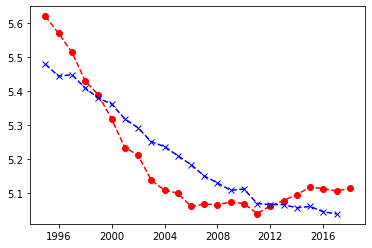

In [131]:
fix, ax = plt.subplots()
ax.plot(df_plot1[df_plot1['geslacht'] == 'v'].index, \
        df_plot1[df_plot1['geslacht'] == 'v']['gemiddelde_lengte'], \
        linestyle = '--', \
        marker = 'o', \
        color = 'r')
ax.plot(df_plot1[df_plot1['geslacht'] == 'm'].index, 
        df_plot1[df_plot1['geslacht'] == 'm']['gemiddelde_lengte'], \
        linestyle = '--', \
        marker = 'x', \
        color = 'b')
plt.show()

In [0]:
df_plot2 = df_all.groupby(['geslacht','eerste_letter'])['aantal'].sum()
df_plot2 = df_plot2.reset_index().set_index('eerste_letter')
df_plot2

In [0]:
letters = list(df_plot2[df_plot2.geslacht == 'v'].index)
N = len(letters)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], letters)
 
# Draw ylabels
ax.set_yscale('log')
ax.set_rlabel_position(0)

plt.yticks([10,100,1000,10000], ['10','100','1000','10000'], color="grey", size=7)
plt.ylim(1,50000)

# Ind1
values=df_plot2[df_plot2.geslacht == 'm']['aantal'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='jongens')
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values = df_plot2[df_plot2.geslacht == 'v']['aantal'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='meisjes')
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))